In [20]:
# In this exercise, we'll use the Titanic dataset as before, train two classifiers and
# look at their confusion matrices. Your job is to create a train/test split in the data
# and report the results in the dictionary at the bottom.

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Load the dataset
from sklearn import datasets

X = pd.read_csv('titanic_data.csv')

X = X._get_numeric_data()
y = X['Survived']
del X['Age'], X['Survived']

In [21]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [22]:
# TODO: split the data into training and testing sets,
# using the default settings for train_test_split (or test_size = 0.25 if specified).
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.4, random_state=0)

In [23]:

# Then, train and test the classifiers with your newly split data instead of X and y.

clf1 = DecisionTreeClassifier()
clf1.fit(xTrain,yTrain)
cMatrixTree = confusion_matrix(yTest, clf1.predict(xTest))
print "Confusion matrix for this Decision Tree:\n",cMatrixTree #confusion_matrix(y,clf1.predict(X))

clf2 = GaussianNB()
clf2.fit(xTrain,yTrain)
cMatrixBayes = confusion_matrix(yTest, clf2.predict(xTest))
print "GaussianNB confusion matrix:\n",cMatrixBayes #confusion_matrix(y,clf2.predict(X))

#TODO: store the confusion matrices on the test sets below

confusions = {
 "Naive Bayes": cMatrixTree,
 "Decision Tree": cMatrixBayes
}

Confusion matrix for this Decision Tree:
[[167  54]
 [ 68  68]]
GaussianNB confusion matrix:
[[188  33]
 [ 84  52]]


In [24]:
confusions

{'Decision Tree': array([[188,  33],
        [ 84,  52]]), 'Naive Bayes': array([[167,  54],
        [ 68,  68]])}

Confusion matrix, without normalization
[[167  54]
 [ 68  68]]


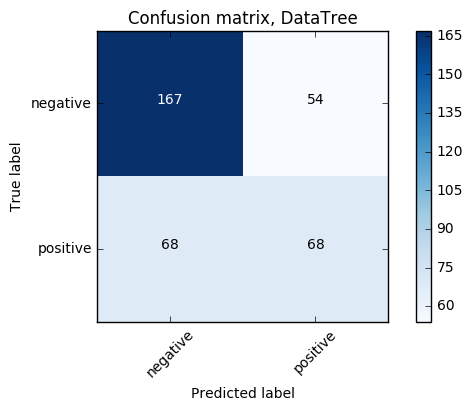

Confusion matrix, without normalization
[[188  33]
 [ 84  52]]


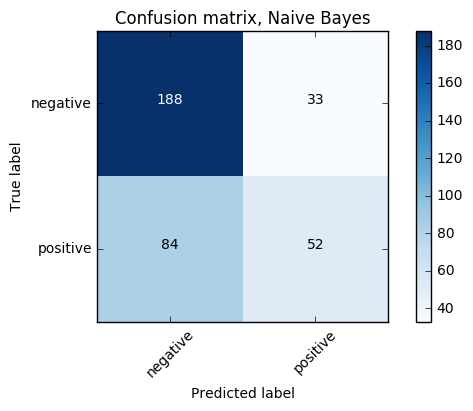

In [27]:
#plot.
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ["negative", "positive"] 
plot_confusion_matrix(cMatrixTree, classes=class_names, title='Confusion matrix, DataTree')

plt.show()

plt.figure()
class_names = ["negative", "positive"] 
plot_confusion_matrix(cMatrixBayes, classes=class_names, title='Confusion matrix, Naive Bayes')

plt.show()